# Post-processing of DRN_transient_simulations

## Setup

In [1]:
# Import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import rasterio as rio

In [2]:
# Define needed paths and model name
cwd = os.getcwd()   # Where this file is saved
model_ws = [os.path.join(cwd, 'RUN0_15P_FONT'), os.path.join(cwd, 'WIRR_15P_FONT')]
model_name = ['RUN0_15P_FONT', 'WIRR_15P_FONT']

## Load the results

In [ ]:
# Load the starting DRN parameters
drn = pd.read_excel(os.path.join(cwd, 'test_files', 'drn_transient', 'DRN_PARS.xlsx'))

# Load the 3D arrays results
kversion = '250221_115504'
hds3d_res = {}
drn3d_res = {}
for mn, mws in zip(model_name, model_ws):
    with open(os.path.join(mws, f'{mn}_hds3d_{kversion}.pickle'), 'rb') as f:
            hds3d_res[mn] = pickle.load(f)
    with open(os.path.join(mws, f'{mn}_drn3d_{kversion}.pickle'), 'rb') as f:
            drn3d_res[mn] = pickle.load(f)

# Access the results

### hds

In [ ]:
# To extract one particular realization:
model = 'RUN0_15P_FONT' # specify the model
realization = 1        # k realization number 2
hds3d_res[model][:,:,realization]

array([[999., 999., 999., ..., 999., 999., 999.],
       [999., 999., 999., ..., 999., 999., 999.],
       [999., 999., 999., ..., 999., 999., 999.],
       ...,
       [999., 999., 999., ..., 999., 999., 999.],
       [999., 999., 999., ..., 999., 999., 999.],
       [999., 999., 999., ..., 999., 999., 999.]])

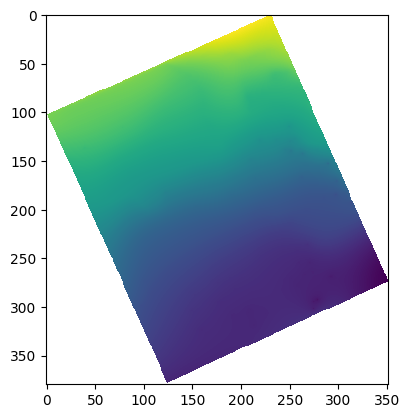

In [11]:
# Plot it
tool = hds3d_res[model][:,:,realization].copy()
tool[tool == 999] = np.nan
plt.imshow(tool)

In [ ]:
# Export as a raster
# Give the name to the raster
raster_name = 'RUN0_15P_FONT_K43'

# Export
upper_left = (1491600.1, 5046099.53) #coordinates of the upper left corner of the model
xsize, ysize = 50, 50
transform = rio.transform.from_origin(upper_left[0], upper_left[1], xsize, ysize)
raster = rio.open(os.path.join(cwd, f'{raster_name}.tiff'),
                  'w', driver='GTiff',
                  height = tool.shape[0], width = tool.shape[1],
                  count=1, dtype=str(tool.dtype),
                  crs = rio.CRS.from_epsg(3003),
                  transform = transform)
raster.write(tool, 1)
raster.close()

### drn

In [ ]:
# fix sp an ts numbering in the drn file
# only needed for k_version = 250222_162244, 250221_143737
fixed_spts = pd.read_csv(os.path.join(cwd, 'test_files', 'fixed_spts.csv'))

def fix_sp_ts(array, drn, fixed_spts):
    out = pd.DataFrame(array, columns = drn.reach.to_list() + ['sp','ts'])
    out['sp'] = fixed_spts.sp_corr
    out['ts'] = fixed_spts.ts_corr
    out = out.sort_values(['sp','ts']).reset_index(drop=True)
    return out

for model in model_name:
    for realization in range(0,drn3d_res[model].shape[2]):
        drn3d_res[model][:,:,realization] = fix_sp_ts(drn3d_res[model][:,:,realization],
                                                      drn, fixed_spts)

In [ ]:
# To extract one particular realization:
model = 'RUN0_15P_FONT' # specify the model
realization = 1        # k realization number 2
drn3d_res[model][:,:,realization]

array([[-0.01896022,  0.        ,  0.        , ..., -0.07474156,
        -0.01790297, -0.00741928],
       [-0.01396446,  0.        ,  0.        , ..., -0.07134365,
        -0.01282398, -0.00512983],
       [-0.01673031,  0.        ,  0.        , ..., -0.07293625,
        -0.01486821, -0.00628973],
       ...,
       [-0.01163052,  0.        ,  0.        , ..., -0.06941272,
        -0.01139918, -0.00399019],
       [-0.0114536 ,  0.        ,  0.        , ..., -0.06868923,
        -0.01109376, -0.00387348],
       [-0.01115045,  0.        ,  0.        , ..., -0.06779367,
        -0.01070155, -0.00369269]])

In [ ]:
# Obtain reach info associated to the realization
tool = drn3d_res[model][:,:,realization]
tool = pd.DataFrame(tool, columns = drn.sort_values('reach').reach.to_list() + ['sp','ts'])
tool

## Operate on the results

In [47]:
# Compute the mean head of the models 
model = 'RUN0_15P_FONT' # specify the model
mean_hds = np.mean(hds3d_res[model], axis = 2) # this provides the mean over the k realizations

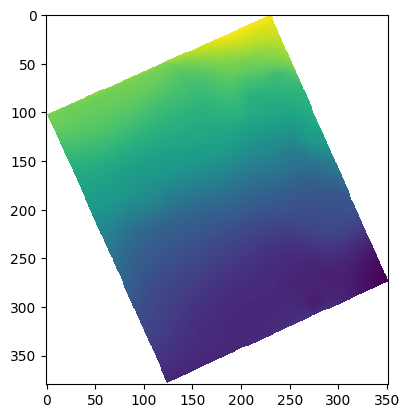

In [ ]:
# Plot it
tool = mean_hds.copy()
tool[tool == 999] = np.nan
plt.imshow(tool)

In [ ]:
# Compute the std of the head of the models 
model = 'RUN0_15P_FONT' # specify the model
std_hds = np.std(hds3d_res[model], axis = 2) # this provides the mean over the k realizations

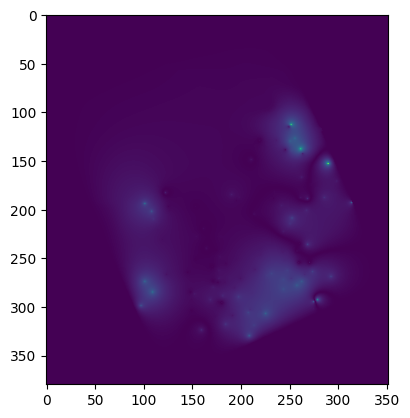

In [ ]:
# Plot it
tool = std_hds
plt.imshow(tool)

## bug fix

In [25]:
drn = pd.read_excel(os.path.join(cwd, 'test_files', 'drn_transient', 'DRN_PARS.xlsx'))
drn.c = drn.c - 1
drn.r = drn.r - 1

In [6]:
import flopy

In [7]:
cbb = flopy.utils.binaryfile.CellBudgetFile(os.path.join(cwd,  'test_files', 'drn_transient', 'RUN0_15P_FONT_results','RUN0_15P_FONT.cbb'))

In [36]:
sps, tss, tsave = [], [], pd.DataFrame()

In [37]:
sps

[]

In [ ]:
# Extract the DRN flux for all drains at all timesteps
n_sp = 20
n_ts = 5



In [42]:
tsave

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,sp,ts
0,-0.018819,0.000000,-0.002004,-0.025187,-0.089814,-0.098823,-0.074191,-0.045377,-0.054196,-0.049071,...,-0.070409,-0.072160,-0.012509,-0.009342,-0.004704,-0.018491,-0.032356,-0.015234,1,1
0,-0.020928,-0.000053,-0.003568,-0.027685,-0.093712,-0.101543,-0.078661,-0.049038,-0.058061,-0.052645,...,-0.075136,-0.076620,-0.013584,-0.010478,-0.005746,-0.021014,-0.034544,-0.017873,2,1
0,-0.023110,-0.001801,-0.005450,-0.030023,-0.095510,-0.103127,-0.080578,-0.051206,-0.060234,-0.055026,...,-0.077242,-0.078682,-0.014606,-0.011623,-0.006979,-0.023108,-0.036580,-0.020297,2,2
0,-0.025230,-0.003573,-0.007346,-0.032212,-0.097383,-0.104897,-0.082392,-0.053091,-0.062132,-0.057047,...,-0.079205,-0.080707,-0.015690,-0.012792,-0.008336,-0.025151,-0.038636,-0.022583,2,3
0,-0.027141,-0.005235,-0.009091,-0.034115,-0.099372,-0.106901,-0.084135,-0.054774,-0.063825,-0.058803,...,-0.081047,-0.082717,-0.016801,-0.013957,-0.009704,-0.026989,-0.040487,-0.024595,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.024010,-0.004374,-0.007442,-0.030018,-0.085171,-0.092226,-0.069259,-0.042216,-0.051041,-0.047383,...,-0.067782,-0.069983,-0.016671,-0.013422,-0.009549,-0.022371,-0.035058,-0.020108,20,1
0,-0.020758,-0.001573,-0.004481,-0.026545,-0.083435,-0.090744,-0.067247,-0.039751,-0.048600,-0.044624,...,-0.065561,-0.067949,-0.015045,-0.011626,-0.007536,-0.019408,-0.032191,-0.016618,20,2
0,-0.018064,0.000000,-0.001950,-0.023917,-0.081780,-0.089168,-0.065573,-0.037895,-0.046760,-0.042602,...,-0.063717,-0.066163,-0.013487,-0.009976,-0.005589,-0.016893,-0.029744,-0.013827,20,3
0,-0.015815,0.000000,0.000000,-0.021772,-0.079993,-0.087364,-0.063902,-0.036187,-0.045046,-0.040801,...,-0.061922,-0.064357,-0.012007,-0.008434,-0.003774,-0.014635,-0.027560,-0.011521,20,4


In [29]:
saveflux

,reach,sp1-ts1,sp2-ts1,sp2-ts2,sp2-ts3,sp2-ts4,sp2-ts5,sp3-ts1,sp3-ts2,sp3-ts3,...,sp19-ts1,sp19-ts2,sp19-ts3,sp19-ts4,sp19-ts5,sp20-ts1,sp20-ts2,sp20-ts3,sp20-ts4,sp20-ts5
0,500,-0.018819,-0.020928,-0.023110,-0.025230,-0.027141,-0.028805,-0.030312,-0.031763,-0.033033,...,-0.020857,-0.022840,-0.024657,-0.026225,-0.027547,-0.024010,-0.020758,-0.018064,-0.015815,-0.014089
1,501,0.000000,-0.000053,-0.001801,-0.003573,-0.005235,-0.006716,-0.008069,-0.009453,-0.010725,...,-0.000740,-0.002616,-0.004343,-0.005855,-0.007140,-0.004374,-0.001573,0.000000,0.000000,0.000000
2,502,-0.002004,-0.003568,-0.005450,-0.007346,-0.009091,-0.010628,-0.012008,-0.013416,-0.014672,...,-0.003784,-0.005697,-0.007468,-0.009004,-0.010303,-0.007442,-0.004481,-0.001950,0.000000,0.000000
3,503,-0.025187,-0.027685,-0.030023,-0.032212,-0.034115,-0.035781,-0.037690,-0.039247,-0.040504,...,-0.027430,-0.029609,-0.031551,-0.033186,-0.034571,-0.030018,-0.026545,-0.023917,-0.021772,-0.020188
4,504,-0.089814,-0.093712,-0.095510,-0.097383,-0.099372,-0.101604,-0.102922,-0.103638,-0.104371,...,-0.083997,-0.085355,-0.086823,-0.088394,-0.090160,-0.085171,-0.083435,-0.081780,-0.079993,-0.078164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,618,-0.009342,-0.010478,-0.011623,-0.012792,-0.013957,-0.015062,-0.016103,-0.017119,-0.018116,...,-0.010736,-0.012001,-0.013224,-0.014385,-0.015450,-0.013422,-0.011626,-0.009976,-0.008434,-0.007119
144,619,-0.004704,-0.005746,-0.006979,-0.008336,-0.009704,-0.010987,-0.012104,-0.013261,-0.014407,...,-0.006242,-0.007579,-0.008946,-0.010248,-0.011427,-0.009549,-0.007536,-0.005589,-0.003774,-0.002253
145,659,-0.018491,-0.021014,-0.023108,-0.025151,-0.026989,-0.028612,-0.030174,-0.031538,-0.032744,...,-0.020071,-0.021826,-0.023454,-0.024912,-0.026179,-0.022371,-0.019408,-0.016893,-0.014635,-0.012874
146,533,-0.032356,-0.034544,-0.036580,-0.038636,-0.040487,-0.042126,-0.043574,-0.044844,-0.045947,...,-0.032844,-0.034397,-0.035872,-0.037219,-0.038429,-0.035058,-0.032191,-0.029744,-0.027560,-0.025841
